In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt


In [2]:
disease_rwr_proba_fs = pd.read_csv('../../models/funGENE/disease/probability/rwr_whole.csv')
disease_n_rwr = pd.read_csv('../../models/funGENE/disease/n_fs/disease_rwr.txt', header=None)
disease_vip_rwr = pd.read_csv('../../data/processed/fs/disease/disease_rwr_fs_apid_huri.csv')
disease_protein_indexes = pd.read_csv('../../data/processed/disgenet_prot_index_main_comp.csv')
disease_protein_indexes = disease_protein_indexes[disease_protein_indexes['increase']<0.4].reset_index()
disease_rwr_proba_fs['new_proteins'] = disease_rwr_proba_fs['new_proteins'].apply(literal_eval)
disease_rwr_proba_fs['process'] = disease_protein_indexes['process']
disease_n_rwr['process'] = disease_protein_indexes['process']
disease_vip_rwr['process'] = disease_protein_indexes['process']
disease_vip_rwr.set_index('process', inplace=True)
disease_vip_rwr.columns = disease_protein_indexes['process']
disease_rwr_scores = pd.read_csv('../../data/processed/metrics/disease_rwr_apid_huri.csv', index_col=0)
disgenet_labels_df = pd.read_csv("../../data/processed/disgenet_filtered_labels_apid_huri.csv", sep=',', names=disease_rwr_scores.columns)
disgenet_labels_df['protein_id'] = disease_rwr_scores.index
disgenet_labels_df.set_index('protein_id', inplace=True)
gene_disease_associations = pd.read_csv('../../data/raw/curated_gene_disease_associations.tsv', sep='\t')

In [3]:
gene_disease_associations.drop_duplicates(subset='diseaseId', inplace=True)
gene_disease_associations.sort_values(by='diseaseId', inplace=True)
disease_names = gene_disease_associations[gene_disease_associations['diseaseId'].isin(disease_protein_indexes['process'])]['diseaseName'].values

In [4]:
disease_rwr_proba_fs['disease_name'] = disease_names

In [5]:
disease_rwr_proba_fs['disease_name'] = disease_rwr_proba_fs['disease_name'].apply(lambda row: ' '.join(row.split(',')[::-1]))
disease_rwr_proba_fs['disease_name']

0                                         Adenocarcinoma
1                         Chronic Alcoholic Intoxication
2                                       Alloxan Diabetes
3                                    Alzheimer's Disease
4                          Amyotrophic Lateral Sclerosis
                             ...                        
198                                      HIV Coinfection
199     Rheumatoid Factor Negative  Juvenile Polyarth...
200     Rheumatoid Factor Positive  Juvenile Polyarth...
201    Familial thoracic aortic aneurysm and aortic d...
202                                 Fibrosing Alveolitis
Name: disease_name, Length: 203, dtype: object

In [6]:
disease_n_rwr[disease_n_rwr['process']=='C0003873'][0].values[0]

11

In [7]:
selected_diseases = list(disease_vip_rwr['C0003873'].sort_values(ascending=False)[:disease_n_rwr[disease_n_rwr['process']=='C0003873'][0].values[0]].index)
selected_diseases

['C0003873',
 'C0020517',
 'C1527304',
 'C0021368',
 'C0032285',
 'C0887898',
 'C3714636',
 'C0032300',
 'C1563937',
 'C0004153',
 'C0345967']

In [8]:
disease_protein_indexes[disease_protein_indexes['process'].isin(selected_diseases)]

,index,process,proteins_ids,protein_index,n_proteins,main_component,conservative_module,added_nodes,len_main_component,len_cm,len_added_nodes,main_component_ids,conservative_module_ids,added_nodes_ids,increase
5,8,C0003873,"['ADORA2A', 'GRK2', 'ACAN', 'AGER', 'AHR', 'AL...","[327, 6012, 121, 374, 411, 536, 699, 4977, 142...",169,"[327, 6012, 121, 374, 411, 536, 699, 4977, 142...","[13836, 536, 5661, 38, 15399, 8748, 15407, 824...","[5979, 4547, 800, 6299, 14738, 16476, 14561, 2...",228,169,59,"['ADORA2A', 'GRK2', 'ACAN', 'AGER', 'AHR', 'AL...","['SOD2', 'ALOX5', 'GIN1', 'ABCB1', 'TRAF1', 'M...","['GRB2', 'EP300', 'APP', 'HDAC2', 'TEX101', 'Y...",0.349112
6,10,C0004153,"['ABCA1', 'PARP1', 'AGER', 'AGT', 'AHR', 'ALOX...","[26, 10365, 374, 396, 411, 536, 537, 534, 770,...",58,"[26, 10365, 374, 396, 411, 536, 537, 534, 770,...","[770, 16132, 13830, 6794, 13835, 396, 13836, 8...","[5979, 1360, 6956, 15876, 2020, 3569, 13321, 9...",80,57,23,"['ABCA1', 'PARP1', 'AGER', 'AGT', 'AHR', 'ALOX...","['APOA4', 'VEGFA', 'SOCS3', 'IFNG', 'SOD1', 'A...","['GRB2', 'BCL2L13', 'IL6ST', 'UBQLN1', 'CAV1',...",0.396552
48,62,C0020517,"['ABCF1', 'ALB', 'CASP1', 'CD40LG', 'CCR1', 'C...","[63, 484, 1991, 2337, 2261, 2267, 3321, 3523, ...",64,"[63, 484, 1991, 2337, 2261, 2267, 3321, 3523, ...","[6913, 6914, 3465, 2314, 6794, 3468, 15246, 15...","[800, 3119, 7198, 8510, 6440, 11789, 15228, 69...",88,63,25,"['ABCF1', 'ALB', 'CASP1', 'CD40LG', 'CCR1', 'C...","['IL1R1', 'IL1R2', 'CX3CL1', 'CD274', 'IFNG', ...","['APP', 'COPS5', 'JAK1', 'MBP', 'HLA-A', 'QSOX...",0.390625
51,66,C0021368,"['ASIC2', 'ASIC1', 'PARP1', 'AGER', 'AGT', 'AH...","[1039, 1038, 10365, 374, 396, 411, 476, 598, 7...",122,"[1038, 10365, 374, 396, 411, 476, 598, 768, 14...","[14337, 10250, 13835, 1038, 8208, 1040, 5141, ...","[4547, 3715, 6700, 1211, 4351, 5979, 800, 2020...",157,121,37,"['ASIC1', 'PARP1', 'AGER', 'AGT', 'AHR', 'AKT1...","['SULT2B1', 'OXT', 'SOD1', 'ASIC1', 'LTB4R', '...","['EP300', 'DDX19B', 'HTT', 'ATXN3', 'EGFR', 'G...",0.303279
82,109,C0032285,"['ABCF1', 'PARP1', 'AGT', 'AHR', 'CASP1', 'CD4...","[63, 10365, 396, 411, 1991, 2337, 2261, 2267, ...",54,"[63, 10365, 396, 411, 1991, 2337, 2261, 2267, ...","[6913, 6914, 4355, 3465, 6794, 396, 3468, 1524...","[12411, 3119, 5979, 2218, 15228, 11789, 6937, ...",72,53,19,"['ABCF1', 'PARP1', 'AGT', 'AHR', 'CASP1', 'CD4...","['IL1R1', 'IL1R2', 'EGR1', 'CX3CL1', 'IFNG', '...","['RNF4', 'COPS5', 'GRB2', 'CCL5', 'TNFAIP6', '...",0.351852
83,110,C0032300,"['ABCF1', 'PARP1', 'AGT', 'AHR', 'CASP1', 'CD4...","[63, 10365, 396, 411, 1991, 2337, 2261, 2267, ...",54,"[63, 10365, 396, 411, 1991, 2337, 2261, 2267, ...","[6913, 6914, 4355, 3465, 6794, 396, 3468, 1524...","[12411, 3119, 5979, 2218, 15228, 11789, 6937, ...",72,53,19,"['ABCF1', 'PARP1', 'AGT', 'AHR', 'CASP1', 'CD4...","['IL1R1', 'IL1R2', 'EGR1', 'CX3CL1', 'IFNG', '...","['RNF4', 'COPS5', 'GRB2', 'CCL5', 'TNFAIP6', '...",0.351852
138,192,C0345967,"['NAT2', 'PARP1', 'ANXA2', 'APOA1', 'BCL2', 'C...","[9369, 10365, 697, 768, 1354, 1818, 1897, 1525...",103,"[9369, 10365, 697, 768, 1354, 1818, 1897, 1525...","[5130, 8205, 5139, 5151, 3113, 8748, 15408, 13...","[15877, 1221, 9799, 5979, 800, 6956, 13603, 16...",136,101,35,"['NAT2', 'PARP1', 'ANXA2', 'APOA1', 'BCL2', 'C...","['FGD6', 'LTA', 'FGF18', 'FGF9', 'COPG1', 'MIF...","['UBQLN2', 'AURKA', 'NPM1', 'GRB2', 'APP', 'IL...",0.339806
158,237,C0887898,"['ABCF1', 'PARP1', 'AGT', 'AHR', 'CASP1', 'CD4...","[63, 10365, 396, 411, 1991, 2337, 2261, 2267, ...",54,"[63, 10365, 396, 411, 1991, 2337, 2261, 2267, ...","[6913, 6914, 4355, 3465, 6794, 396, 3468, 1524...","[12411, 3119, 5979, 2218, 15228, 11789, 6937, ...",72,53,19,"['ABCF1', 'PARP1', 'AGT', 'AHR', 'CASP1', 'CD4...","['IL1R1', 'IL1R2', 'EGR1', 'CX3CL1', 'IFNG', '...","['RNF4', 'COPS5', 'GRB2', 'CCL5', 'TNFAIP6', '...",0.351852
175,258,C1527304,"['ABCF1', 'ALB', 'CASP1', 'CD40LG', 'CCR1', 'C...","[63, 484, 1991, 2337, 2261, 2267, 3523, 4150, ...",63,"[63, 484, 1991, 2337, 2261, 2267, 352

In [9]:
disease_proteins = list(disgenet_labels_df[disgenet_labels_df['C0003873']==1]['C0003873'].index)
new_proteins = list(disease_rwr_proba_fs[disease_rwr_proba_fs['process'] == 'C0003873']['new_proteins'].values[0])
all_disease_proteins = disease_proteins+new_proteins

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(disease_rwr_scores[disease_rwr_scores.index.isin(all_disease_proteins)][selected_diseases])


array([[ 1.10176156e-03, -5.13070108e-05, -1.82078453e-04, ...,
         7.28087637e-18, -5.60721190e-18, -8.42484314e-19],
       [-1.01932478e-03, -2.73599313e-04, -7.85591684e-05, ...,
         2.02414487e-18,  1.07807959e-18, -1.88577458e-18],
       [-1.03244665e-03, -2.98220097e-04, -7.34755761e-05, ...,
         6.51902958e-19, -8.42823083e-19, -1.30961024e-19],
       ...,
       [-3.30305120e-04,  2.60285686e-03, -4.73720284e-04, ...,
        -1.26318119e-17, -6.36728663e-19,  8.81731528e-19],
       [-7.53054321e-06,  1.85478141e-04,  9.42804970e-05, ...,
         1.10404766e-17, -3.07942622e-19, -1.08163213e-18],
       [ 1.08731369e-03,  9.15592923e-04,  4.36993183e-04, ...,
        -4.64993167e-19,  8.87706063e-18,  2.94937614e-18]])

In [11]:
def broken_stick(n_components):
    brk_stk_values = []
    for i in range(1,n_components+1):
        sum_values = 0
        for j in range(i,n_components+1):
            sum_values += 1/j
        brk_stk_values.append(sum_values/n_components)
    return brk_stk_values

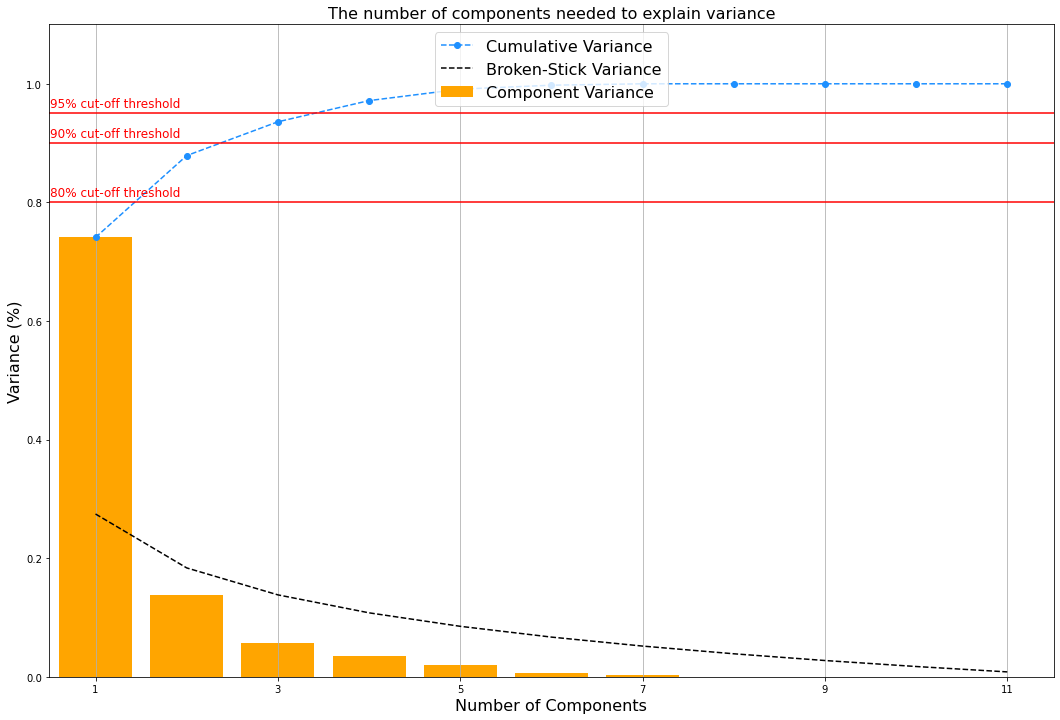

In [12]:
plt.rcParams["figure.figsize"] = (18,12)

fig, ax = plt.subplots()
xi = np.arange(1, 12, step=1)
sum_y = np.cumsum(pca.explained_variance_ratio_)
ind_y = pca.explained_variance_ratio_

plt.ylim(0.0,1.1)
plt.plot(xi, sum_y, marker='o', linestyle='--', color='dodgerblue', label = 'Cumulative Variance')
plt.plot(xi, broken_stick(11), linestyle='--', color='black', label = 'Broken-Stick Variance')
plt.bar(xi, ind_y, color='orange', label = 'Component Variance')

plt.xlabel('Number of Components', fontsize=16)
plt.xticks(np.arange(1, 12, step=2))
plt.ylabel('Variance (%)', fontsize=16)
plt.title('The number of components needed to explain variance', fontsize=16)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.96, '95% cut-off threshold', color = 'r', fontsize=12)
plt.text(0.5, 0.91, '90% cut-off threshold', color = 'r', fontsize=12)
plt.text(0.5, 0.81, '80% cut-off threshold', color = 'r', fontsize=12)
ax.legend(loc = 'upper center', prop={'size': 16})
ax.grid(axis='x')
ax.margins(0.01)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

In [13]:
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(disease_rwr_scores[disease_rwr_scores.index.isin(all_disease_proteins)][selected_diseases])
X_PCA_df = pd.DataFrame(X_PCA)

In [14]:
X_PCA_df['protein'] = all_disease_proteins

In [15]:
sum(pca.explained_variance_ratio_)

0.8788985292112524

In [16]:
X_PCA_df['label'] = X_PCA_df.apply(lambda row: 'candidate' if row['protein'] in list(disease_rwr_proba_fs[disease_rwr_proba_fs['process'] == 'C0003873']['new_proteins'].values[0]) else 'known', axis=1)

In [37]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=X_PCA_df[X_PCA_df['label']=='known'][0], y=X_PCA_df[X_PCA_df['label']=='known'][1], 
                        mode='markers', name='Known', 
                        marker=dict(color='#59C3C3', size=20, line=dict(width=2, color='#000000')), 
                        text = X_PCA_df[X_PCA_df['label']=='known']['protein']))
fig.add_trace(go.Scatter(x=X_PCA_df[X_PCA_df['label']=='candidate'][0], y=X_PCA_df[X_PCA_df['label']=='candidate'][1], 
                        mode='markers', name='Predicted', 
                        marker=dict(color='#FDA96D', size=20, line=dict(width=2, color='#000000')), 
                        text = X_PCA_df[X_PCA_df['label']=='candidate']['protein']))
fig.update_layout(
        yaxis_title_text='PC2',
        xaxis_title_text='PC1',
        height=1000,
        width=1200,
        title_x=0.5,
        legend=dict(font=dict(size=40, color='black'), yanchor="bottom", y=1.01, xanchor="right", x=0.99, orientation='h'),
        xaxis = dict(tickfont = dict(size=40), titlefont=dict(size=40), showline=True, linewidth=3, linecolor='black', mirror=True, color='black', nticks=5, range=[-0.00125,0.01]),
        yaxis = dict(tickfont = dict(size=40), titlefont=dict(size=40), showline=True, linewidth=3, linecolor='black', mirror=True, color='black', nticks=6, range=[-0.00255, 0.004]),
        paper_bgcolor='rgba(255,255,255,1)',
        plot_bgcolor='rgba(255,255,255,1)',
        margin=dict(l=20, r=20, t=25, b=20))
fig.show()

In [42]:
import dash_bio

df = disease_rwr_scores[disease_rwr_scores.index.isin(new_proteins)][selected_diseases]
dash_bio.Clustergram(
    data=df,
    column_labels=list(df.columns.values),
    row_labels=list(df.index),
    height=1000,
    width=1500, color_map ='plasma', display_range=(0.00083, 0.002583),
    display_ratio = [0.25, 0.25], paper_bg_color='#FFFFFF', line_width=3, link_method='complete', link_fun=None, annotation_font=dict(size=30), tick_font=dict(size=30)
)

In [44]:
from Bio import Entrez
gene_pmid = {}
for gene in new_proteins:
    Entrez.email = "alexfrcoelho@gmail.com"
    handle = Entrez.esearch(
        db='pubmed',
        term=f'({gene}) AND (rheumatoid AND arthritis)',
        field='Title/Abstract',
        RetMax=1000
    )
    record = Entrez.read(handle)
    gene_pmid[gene] = record["IdList"]
    handle.close()

In [46]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = pd.DataFrame.from_dict(gene_pmid, orient='index').count(axis=1).index, y = pd.DataFrame.from_dict(gene_pmid, orient='index').count(axis=1).values, marker_color='#59C3C3')])
fig.update_layout(
        yaxis_title_text='Nº Papers',
        height=1000,
        width=2000,
        title_x=0.5,
        xaxis = dict(tickfont = dict(size=50), showline=True, linewidth=3, linecolor='black', mirror=True, color='black'),
        yaxis = dict(tickfont = dict(size=50), titlefont=dict(size=50), title_standoff = 30, showline=True, linewidth=3, linecolor='black', mirror=True, color='black'),
        paper_bgcolor='rgba(255,255,255,1)',
        plot_bgcolor='rgba(255,255,255,1)',
        margin=dict(l=20, r=20, t=25, b=20))
fig.show()